#  House Prices Model with Hyperparameter Tuning and Pipelines


Finding the optimal hyperparameters is a challenging task. Traditionally, this involves trying out various combinations manually to determine which parameters yield the best results. However, a more systematic approach involves creating a grid of hyperparameters and testing all possible combinations. This method is aptly named GridSearch. Thankfully, Scikit-learn provides a built-in solution for this called GridSearchCV.

GridSearchCV simplifies the process by taking a dictionary that outlines the parameters to be tested. Each parameter is defined with a set of values to explore.

We tune the parameters of different regreesors and find the best one for our model

See https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html


## Import the basic libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time



## Import the sklearn libraries that will be used

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,KFold

from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.pipeline import Pipeline

## Import the models

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet

## Import the metrics

In [4]:
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, mean_absolute_error

# Load the dataset

In [5]:
housesales_train = pd.read_csv("./Datasets/House_sales_train.csv")
# housesales_test = pd.read_csv("./Datasets/House_sales_test.csv")

In [6]:
# housesales_test.shape

In [7]:
HouseSales = housesales_train.copy()

In [8]:
##descriptive stats  for the whole dataset
HouseSales.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
HouseSales.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
#drop the ID
HouseSales = HouseSales.drop(columns=['Id'])

In [11]:
HouseSales.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [12]:
#Find all columns null entries
columns_with_null = HouseSales.columns[HouseSales.isnull().any()]
columns_with_null

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [13]:
##descriptive stats  for the whole SalePrice
HouseSales['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [14]:
# Get the number of unique values for each feature
unique_vals =  HouseSales.nunique().sort_values(ascending=False)

# unique_vals = pd.DataFrame(unique_vals)
# pd.set_option('display.max_rows', None)  # Display all rows
print(unique_vals)

LotArea         1073
GrLivArea        861
BsmtUnfSF        780
1stFlrSF         753
TotalBsmtSF      721
                ... 
BsmtHalfBath       3
Alley              2
Utilities          2
Street             2
CentralAir         2
Length: 80, dtype: int64


In [15]:
# Select only the numerical columns
numeric_columns = HouseSales[HouseSales.select_dtypes(include='number').columns]
# numeric_columns.info()

In [16]:
numeric_columns.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [17]:
numeric_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1452 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   int64  
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null   int64  
 18  FullBath

In [18]:
# Calculate mean of each numeric column
means = numeric_columns.mean()

#  Fill null values with means
# updatednumerical_features = numeic_columns.fillna(means)

#  Fill null values with 0
updatednumerical_features = numeric_columns.fillna(0)

## Histograms

In [19]:
def plot_hist_graphs(df):
    # Create a grid of subplots
    n_cols = len(df.columns)
    n_rows = (n_cols + 3) // 4  # Calculate number of rows needed based on number of columns
    fig, axes = plt.subplots(n_rows, 4, figsize=(24, 20))

    axes = axes.flatten()
    for i, ax in enumerate(axes):
        if i < n_cols:
            column_name = df.columns[i]  # Get column name for the subplot
            ax.hist(df[column_name], bins=30, color='green', edgecolor='black') 
            ax.set_title(f'Histogram of {column_name}') 

    # Adjust spacing between subplots
    plt.subplots_adjust(hspace=1.5, wspace=0.2)
    plt.show()

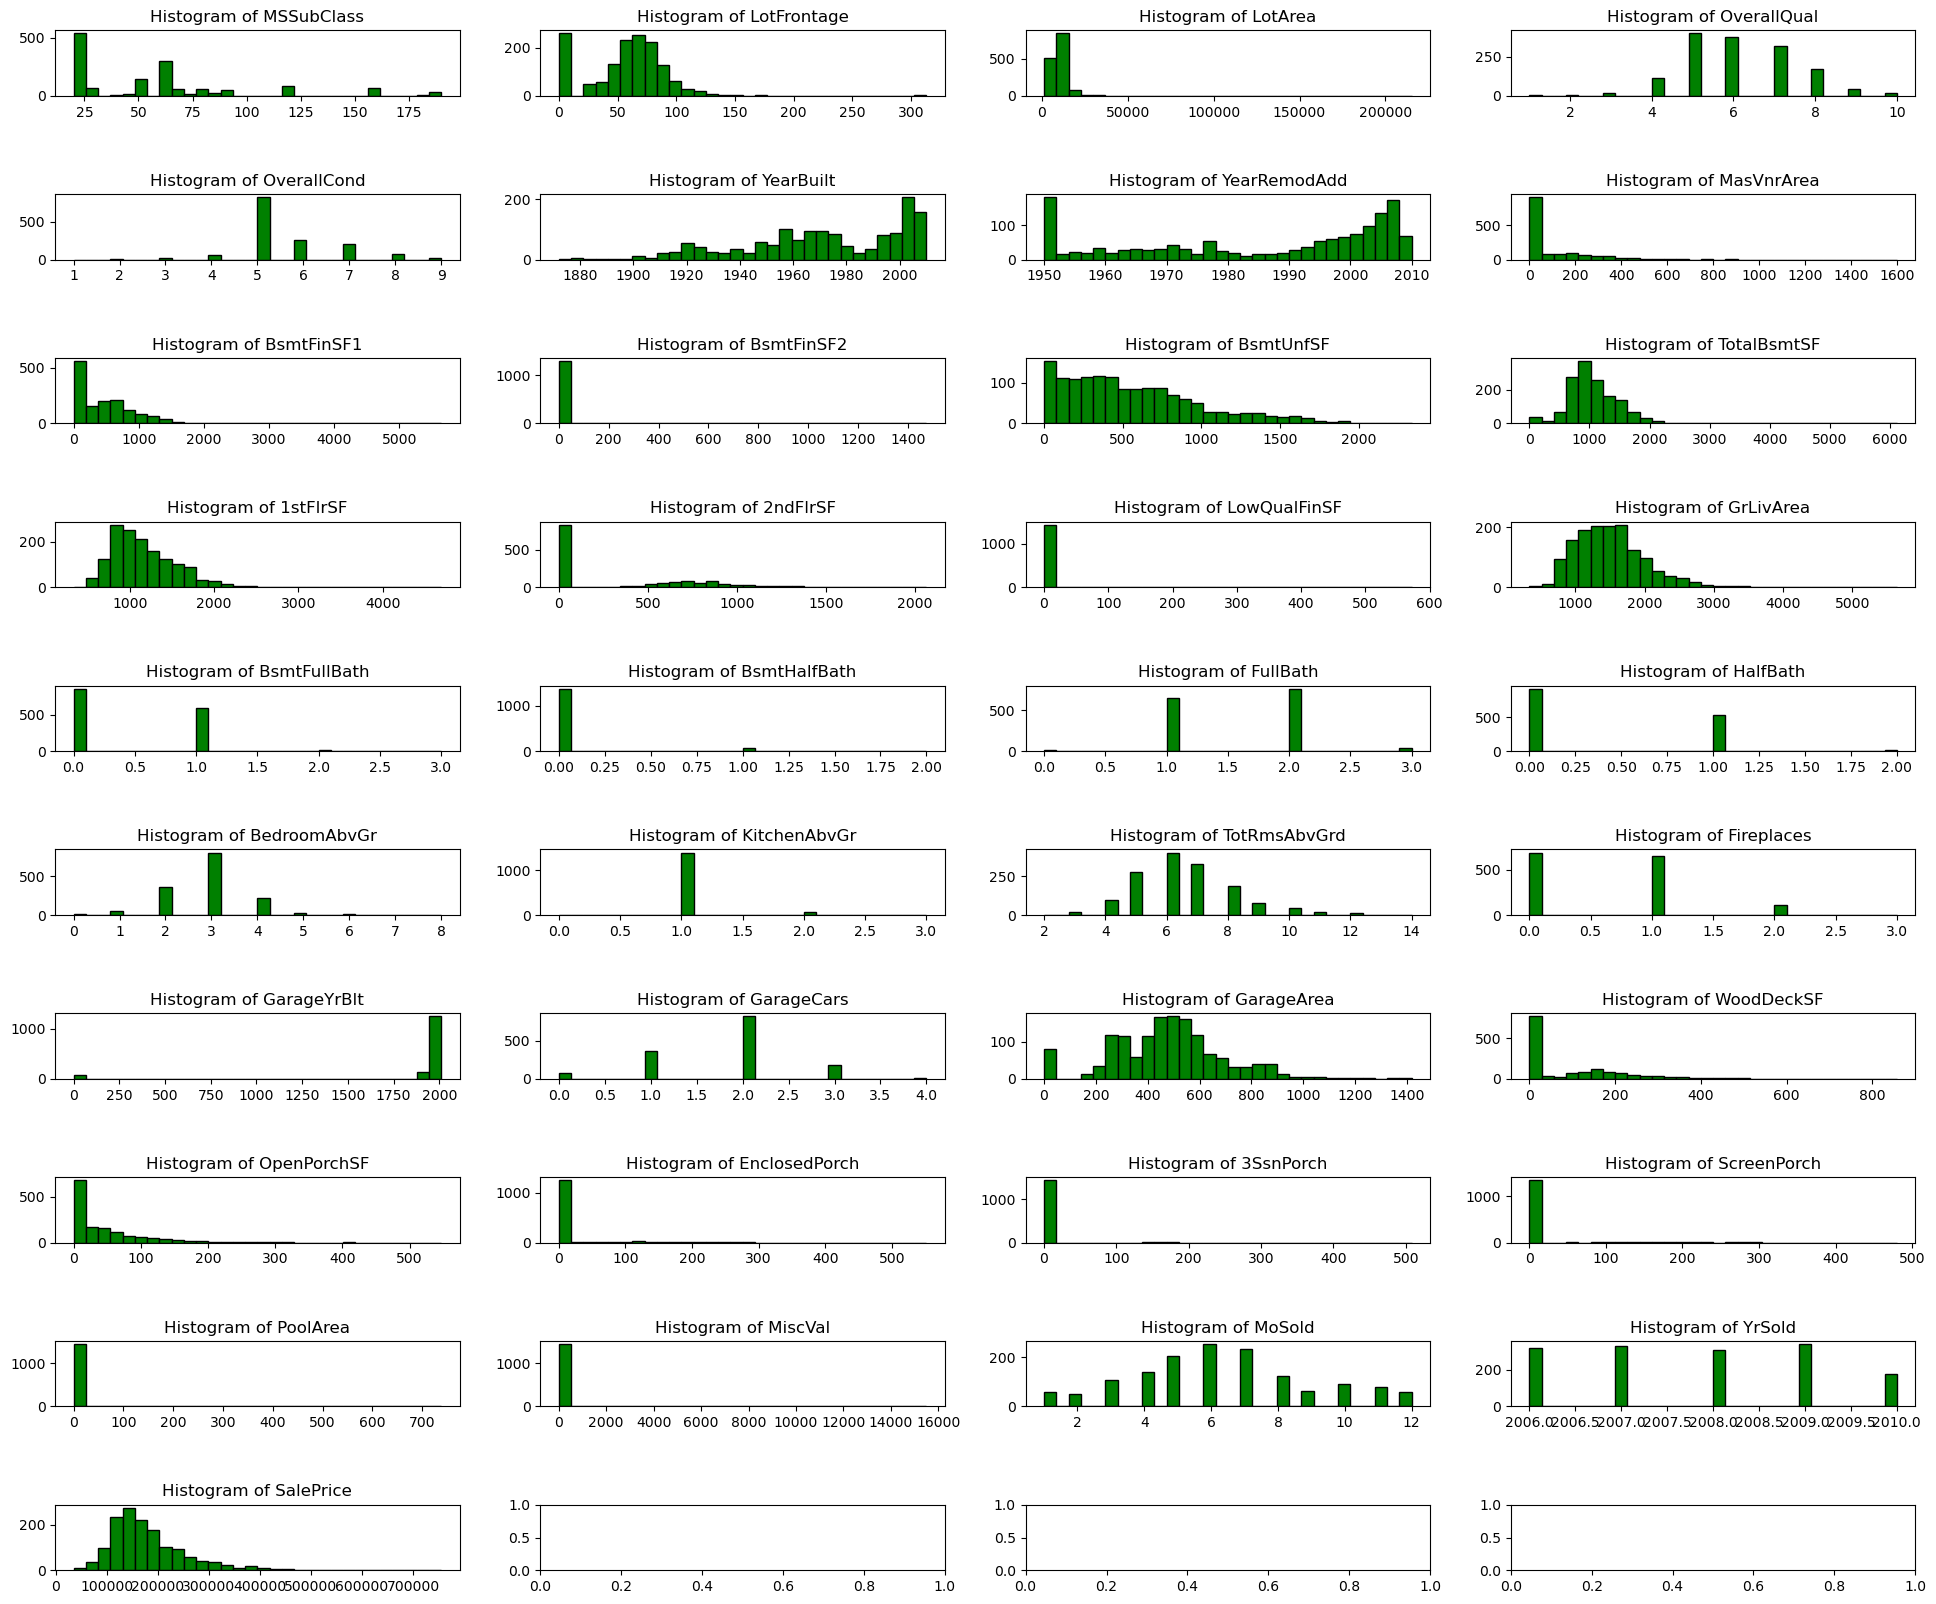

In [20]:
# Plot the histogram of all the numeric features
plot_hist_graphs(updatednumerical_features)


In [21]:
non_numeric_features = housesales_train.select_dtypes(include=['object'])
non_numeric_features = non_numeric_features.fillna('nil')
# non_numeric_features.info()

## Data Engineering

## Feature Encoding : Categorical, ordinal


In [22]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [23]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output= False).set_output(transform='pandas')
ohetransform = ohe.fit_transform(non_numeric_features)

In [24]:
# Combine the numeric and non numeric datasets
HouseSalesEncoded = pd.concat([updatednumerical_features, ohetransform], axis=1)
HouseSalesEncoded.shape

(1460, 304)

## Define the inputs and outputs

In [25]:
X,y = HouseSalesEncoded.loc[:, ~HouseSalesEncoded.columns.isin(['SalePrice'])],HouseSalesEncoded['SalePrice']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)

# Hyperparameter tuning  with RandomSearchCV and GridSearchCV

In [27]:
# Define base models
base_models = [
    ('SVR', SVR()),
    ('Dtree', DecisionTreeRegressor(random_state=42)),
    ('xgb', XGBRegressor()),
    ('rf', RandomForestRegressor()),
    ('EN', ElasticNet(max_iter=10000))
]

In [28]:
# Define a grid of hyperparameters to search
grid_params = [
    {
    'SVR__C': [0.1, 1, 10, 100, 1000],
    'SVR__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'SVR__kernel': ['rbf','linear']
    },
    {
    'Dtree__max_depth': [10, 20, 30, None],
    'Dtree__min_samples_split': [2, 5, 10],
    'Dtree__min_samples_leaf': [1, 2, 4]
    },
    {
    'xgb__n_estimators': [10, 10, 10],
    'xgb__max_depth': [3, 5, 7]
    },
    {
     'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [5, 10, 20],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4],
     'rf__bootstrap': [True, False],
    'rf__warm_start': [True, False]
    },
    {
    'EN__alpha'     : [0.1,1,10,0.01],
    'EN__l1_ratio'  :  np.arange(0.40,1.00,0.10),
    'EN__tol'       : [0.0001,0.001]
    }
]

In [29]:
# Create pipelines for the models
pipelines = []
for model, params in zip(base_models, grid_params):
    pipelines.append(Pipeline([
        ('scaler', StandardScaler()),
        model
    ]))

In [30]:
cv=3

In [31]:
def Grid_search_CV_model(pipeline, param_grids,X_train, y_train):
    # Define the number of folds for cross-validation
    n_splits = 3
    
    # Create a cross-validation splitter
    cv = KFold(n_splits=n_splits, random_state=42, shuffle=True)
    
    # Perform hyperparameter tuning for each pipeline
    best_models, best_params_list = [],[]
    
    for pipeline, params in zip(pipelines, param_grids):
        grid_search = GridSearchCV(estimator=pipeline,
                                                   param_grid=params,
                                                   refit=True,
                                                   scoring='neg_mean_squared_error',
                                                   cv=cv,
                                                   n_jobs=-1,
                                                   verbose=3)  
        grid_search.fit(X_train, y_train.ravel())
        best_models.append(grid_search.best_estimator_)
        best_params_list.append(grid_search.best_params_)
    return  best_models, best_params_list

In [32]:
# # Get the best parameters for each model
price_grid_estimator, price_grid_results = Grid_search_CV_model(pipelines, grid_params, X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Fitting 3 folds for each of 36 candidates, totalling 108 fits
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Fitting 3 folds for each of 324 candidates, totalling 972 fits
[CV 3/3] END SVR__C=0.1, SVR__gamma=1, SVR__kernel=rbf;, score=-5958352831.618 total time=   0.8s
[CV 3/3] END SVR__C=0.1, SVR__gamma=1, SVR__kernel=linear;, score=-5822745756.780 total time=   0.6s
[CV 1/3] END SVR__C=0.1, SVR__gamma=0.1, SVR__kernel=linear;, score=-6454367012.468 total time=   0.7s
[CV 1/3] END SVR__C=0.1, SVR__gamma=0.01, SVR__kernel=rbf;, score=-6593844794.437 total time=   0.7s
[CV 2/3] END SVR__C=0.1, SVR__gamma=0.01, SVR__kernel=linear;, score=-6037995690.344 total time=   0.5s
[CV 1/3] END SVR__C=0.1, SVR__gamma=0.001, SVR__kernel=linear;, score=-6454367012.468 total time=   0.5s
[CV 1/3] END SVR__C=0.1, SVR__gamma=0.0001, SVR__kernel=rbf;, score=-6593910308.253 total time=   0.7s
[CV 2/3] END SVR__C=0.1, SVR__gamma=0.

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.281e+10, tolerance: 4.502e+08
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.574e+10, tolerance: 4.689e+08
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.782e+10, toler

In [33]:
price_grid_estimator

[Pipeline(steps=[('scaler', StandardScaler()),
                 ('SVR', SVR(C=100, gamma=1, kernel='linear'))]),
 Pipeline(steps=[('scaler', StandardScaler()),
                 ('Dtree',
                  DecisionTreeRegressor(max_depth=10, min_samples_split=10,
                                        random_state=42))]),
 Pipeline(steps=[('scaler', StandardScaler()),
                 ('xgb',
                  XGBRegressor(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               m

In [34]:
price_grid_estimator

[Pipeline(steps=[('scaler', StandardScaler()),
                 ('SVR', SVR(C=100, gamma=1, kernel='linear'))]),
 Pipeline(steps=[('scaler', StandardScaler()),
                 ('Dtree',
                  DecisionTreeRegressor(max_depth=10, min_samples_split=10,
                                        random_state=42))]),
 Pipeline(steps=[('scaler', StandardScaler()),
                 ('xgb',
                  XGBRegressor(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               m

In [35]:
import pprint

In [36]:
# Print the best parameters
print("Best Parameters")
pprint.pprint(price_grid_results, width=2)

Best Parameters
[{'SVR__C': 100,
  'SVR__gamma': 1,
  'SVR__kernel': 'linear'},
 {'Dtree__max_depth': 10,
  'Dtree__min_samples_leaf': 1,
  'Dtree__min_samples_split': 10},
 {'xgb__max_depth': 3,
  'xgb__n_estimators': 10},
 {'rf__bootstrap': True,
  'rf__max_depth': 20,
  'rf__min_samples_leaf': 2,
  'rf__min_samples_split': 5,
  'rf__n_estimators': 50,
  'rf__warm_start': False},
 {'EN__alpha': 1,
  'EN__l1_ratio': 0.4,
  'EN__tol': 0.0001}]


## Show the order of model performance

In [37]:
for idx, model in enumerate(price_grid_estimator):
    print (idx,model.steps[-1][1])
    print()

0 SVR(C=100, gamma=1, kernel='linear')

1 DecisionTreeRegressor(max_depth=10, min_samples_split=10, random_state=42)

2 XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

3 RandomForestRegressor(max_depth=20, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=50)

4 ElasticNet(alpha

In [38]:
##Order if performance
for i in range (0,len(price_grid_estimator)):
    display(price_grid_estimator[i])

Pipeline(steps=[('scaler', StandardScaler()),
                ('SVR', SVR(C=100, gamma=1, kernel='linear'))])

Pipeline(steps=[('scaler', StandardScaler()),
                ('Dtree',
                 DecisionTreeRegressor(max_depth=10, min_samples_split=10,
                                       random_state=42))])

Pipeline(steps=[('scaler', StandardScaler()),
                ('xgb',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=3, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=10, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

Pipeline(steps=[('scaler', StandardScaler()),
                ('rf',
                 RandomForestRegressor(max_depth=20, min_samples_leaf=2,
                                       min_samples_split=5, n_estimators=50))])

Pipeline(steps=[('scaler', StandardScaler()),
                ('EN', ElasticNet(alpha=1, l1_ratio=0.4, max_iter=10000))])

In [39]:
def rank_models(best_models, X_test,y_test):
        # Evaluate performance of each model on the validation set
        model_scores = []
        for idx, model in enumerate(best_models):
            # Do a prediction for the model
            y_pred = model.predict(X_test)

            # Calculate mean absolute error
            mae = mean_absolute_error(y_test, y_pred)
            # Store the name of the regressor and its score
            regressor_name = model.steps[-1][0]  # Regressor is the last step in the pipeline
            model_scores.append((regressor_name, mae))
        
        # Sort the models based on their scores in ascending order
        sorted_models = sorted(model_scores, key=lambda x: x[1])
        return sorted_models

In [41]:
sorted_models = rank_models(price_grid_estimator,X_test,y_test)
# Print or display the ranked models with the regressor names
print("Ranked Models (Lowest Mean Absolute Error to Highest)\n")
print(f"Regressor \t Mean Absolute Error ")
for name, score in sorted_models:
    print(f"{name} \t\t {score}")

Ranked Models (Lowest Mean Absolute Error to Highest)

Regressor 	 Mean Absolute Error 
SVR 		 17288.622778546
rf 		 17650.119099821793
EN 		 18600.35925933838
xgb 		 20281.077563142124
Dtree 		 26406.900329095428


## Predictions

In [44]:
# Make predictions with tghe best model
y_pred = price_grid_estimator[0].predict(X_test)

In [45]:
y_df= pd.DataFrame(y_pred)

In [46]:
# Descriptive stats for the predicted SalePrice
y_df.describe()

,0
count,292.000000
mean,174795.585000
std,72529.359251
min,22040.536517
25%,125515.922842
50%,154327.591276
75%,208494.066375
max,498454.424828
